In [1]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("../csvs/NoLyapanovTime/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
print dataset.columns.values

['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window

In [3]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 
y = dataset['Stable']
X = dataset[features]
X.head()

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.396282,0.481704,0.000329,0.001083,0.000214,0.000456,0.000701,0.001978,0.000446,0.000964,...,2.144832e-10,2.681898e-11,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,16.019985
1,1.034575,0.823935,0.000739,0.002137,0.000202,0.000463,0.000200,0.000350,0.000226,0.000377,...,3.559377e-11,-9.314702e-11,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,15.368196
2,0.440470,0.491261,0.001951,0.003550,0.001735,0.002860,0.002303,0.004034,0.002080,0.003409,...,-3.330088e-11,-4.095504e-11,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,25.351948
3,0.432098,0.550624,0.000026,0.000120,0.000005,0.000009,0.000019,0.000050,0.000016,0.000041,...,7.816527e-13,-7.257099e-12,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,19.156777
4,5.722053,17.442426,0.028284,0.063028,0.004313,0.010716,0.038832,0.160685,0.090892,0.112168,...,3.913858e-08,-2.610208e-08,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,4.156005


In [9]:
Nrows = int(0.4*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]
xgbc = XGBClassifier(learning_rate= 0.075, max_depth= 4, min_child_weight= 4.0,scale_pos_weight= 15,
                     subsample = .95, colsample_bytree = 0.8, seed = 0)
params = xgbc.get_xgb_params()
dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX)
bst = xgb.train(params, dtrain)
preds = bst.predict(dtest)
score = metrics.average_precision_score(testY, preds)

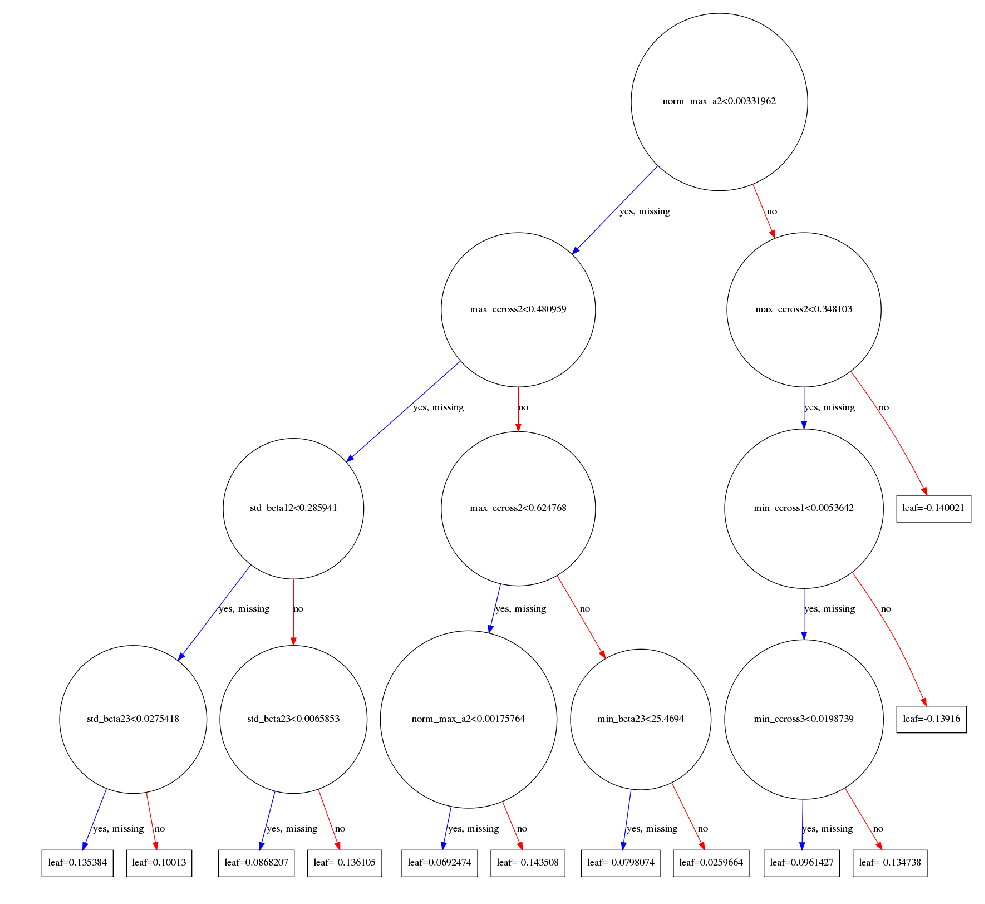

In [15]:
#xgb.plot_tree(feature_names = features, model = bst, n_first_tree = 1)
#xgb.plot_tree(bst, plot_height = 8, plot_width = 12)
xgb.plot_tree(bst, num_trees = 1, shape = "box")
#xgb.plot_tree(bst, num_trees=2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 16)
plt.show()
#fig.savefig('../Figures/Presentation/tree3.png')

In [8]:
print score

0.956071208099
